In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:/Users/manue/Downloads/Employee.csv")

In [10]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


### 1.Data Exploration

In [23]:
print("Unique values in each feature:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique values in each feature:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [27]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [29]:
df.describe()

,age,salary,gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


### 2.Data Cleaning

In [34]:
df.isnull().sum()

company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64

In [36]:
df['age'] = df['age'].replace(0, np.nan)

In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [40]:
df.drop_duplicates(inplace=True)

In [48]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### 3.Data Analysis

In [51]:
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("Filtered Data:")
display(filtered_df)

Filtered Data:


,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
104,Infosys,44.0,4034.0,Delhi,India,0
122,Infosys,44.0,3234.0,Mumbai,India,0


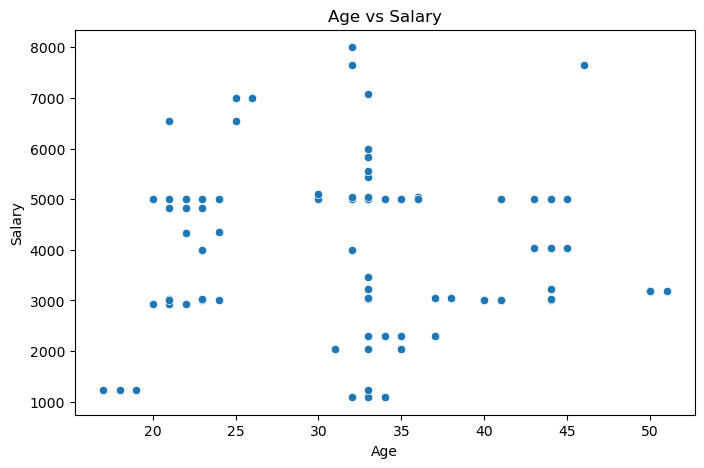

In [57]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

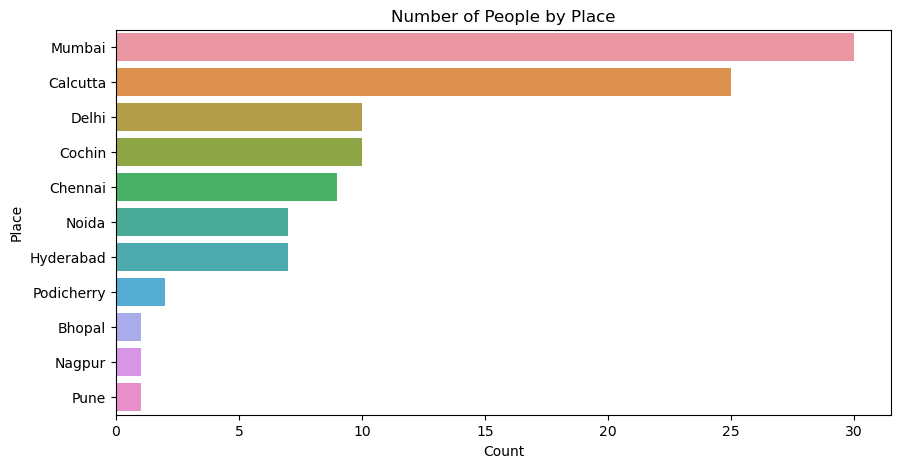

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['place'], order=df['place'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Place")
plt.title("Number of People by Place")
plt.show()

### 4.Data Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [66]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

### 5.Feature Scaling

In [69]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [71]:
scaled_standard = scaler_standard.fit_transform(df)
scaled_minmax = scaler_minmax.fit_transform(df)

In [73]:
df_standard = pd.DataFrame(scaled_standard, columns=df.columns)
df_minmax = pd.DataFrame(scaled_minmax, columns=df.columns)

In [75]:
df_standard.head()

,company,age,salary,place,country,gender
0,0.935857,-1.505184,0.555605,-0.842523,0.0,0.0
1,0.097655,-0.260931,0.555605,0.787146,0.0,0.0
2,0.935857,0.361196,-1.154110,-1.249940,0.0,0.0
3,0.097655,0.983323,-0.710851,-0.027689,0.0,0.0
4,0.935857,-1.131908,-0.077623,0.787146,0.0,0.0


In [77]:
df_minmax.head()

,company,age,salary,place,country,gender
0,1.000000,0.088235,0.565909,0.2,0.0,0.0
1,0.666667,0.382353,0.565909,0.6,0.0,0.0
2,1.000000,0.529412,0.175228,0.1,0.0,0.0
3,0.666667,0.676471,0.276516,0.4,0.0,0.0
4,1.000000,0.176471,0.421213,0.6,0.0,0.0
